# Compare Previous Violations History Experiment

**Goal**: Reproduce the results from the previous violation comparison experiment using base regressors (psytrack), one trial back previous history or filtered previous history

The goal of this is to ensure the model comparison code is working as expected and the interaction comparison results are still valid.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import sys
[
    sys.path.append(str(folder))
    for folder in pathlib.Path("../src/").iterdir()
    if folder.is_dir()
]

from experiment_compare_models import ExperimentCompareModels
from multiclass_logistic_regression import MultiClassLogisticRegression
from model_visualizer import ModelVisualizerCompare
from design_matrix_generator import DesignMatrixGeneratorFilteredHistory
sns.set_context("talk")
%load_ext autoreload
%autoreload 2

In [6]:
model_config = {
    "psytrack_features": {  # MODEL 1
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {"prev_violation": -1},  # no filter & drop column
    },
    "prev_violation": {  # MODEL 2
        "model_class": MultiClassLogisticRegression,
        "model_type": "mutli",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {"prev_violation": 0},  # no filter
    },
    "filter_prev_violation": {  # MODEL 3
        "model_class": MultiClassLogisticRegression,
        "model_type": "mutli",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {
            "prev_violation": 1
        },  # filter column with animals tau
    },
}
params = {
    "animals": None,
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "null_mode": "multi",
    "eval_train": True,
    "tau_columns": ["prev_violation"],
    "model_config": model_config,
}

In [7]:
experiment = ExperimentCompareModels(params)
experiment.run()
experiment.save(file_name="2023_11_10_compare_prev_violation_history.pkl")

returning viol dataset for all animals

 >>>> evaluating animal W051 <<<<

 ***** evaluating model psytrack_features w/ sigma 0.07 *****
         Current function value: 41950.303150
         Iterations: 20
         Function evaluations: 88
         Gradient evaluations: 76

 ***** evaluating model psytrack_features w/ sigma 0.13 *****
         Current function value: 41893.656506
         Iterations: 21
         Function evaluations: 85
         Gradient evaluations: 74

 ***** evaluating model psytrack_features w/ sigma 0.25 *****
Optimization terminated successfully.
         Current function value: 41876.171967
         Iterations: 21
         Function evaluations: 35
         Gradient evaluations: 35

 ***** evaluating model psytrack_features w/ sigma 0.5 *****
Optimization terminated successfully.
         Current function value: 41871.260132
         Iterations: 20
         Function evaluations: 33
         Gradient evaluations: 33

 ***** evaluating model psytrack_features w/ s

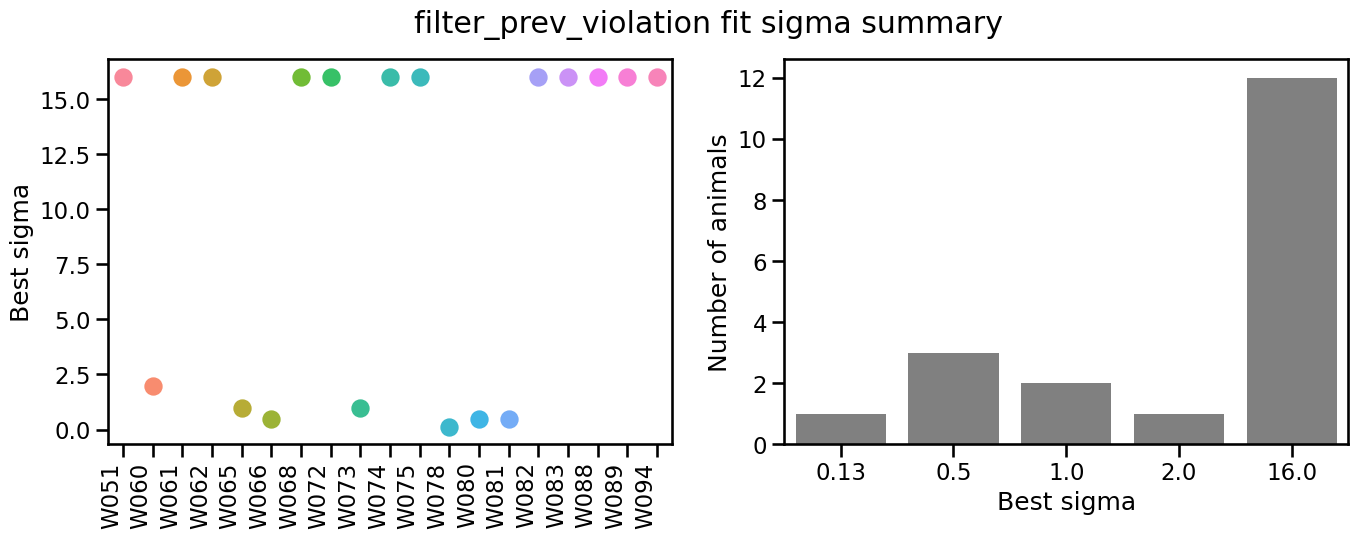

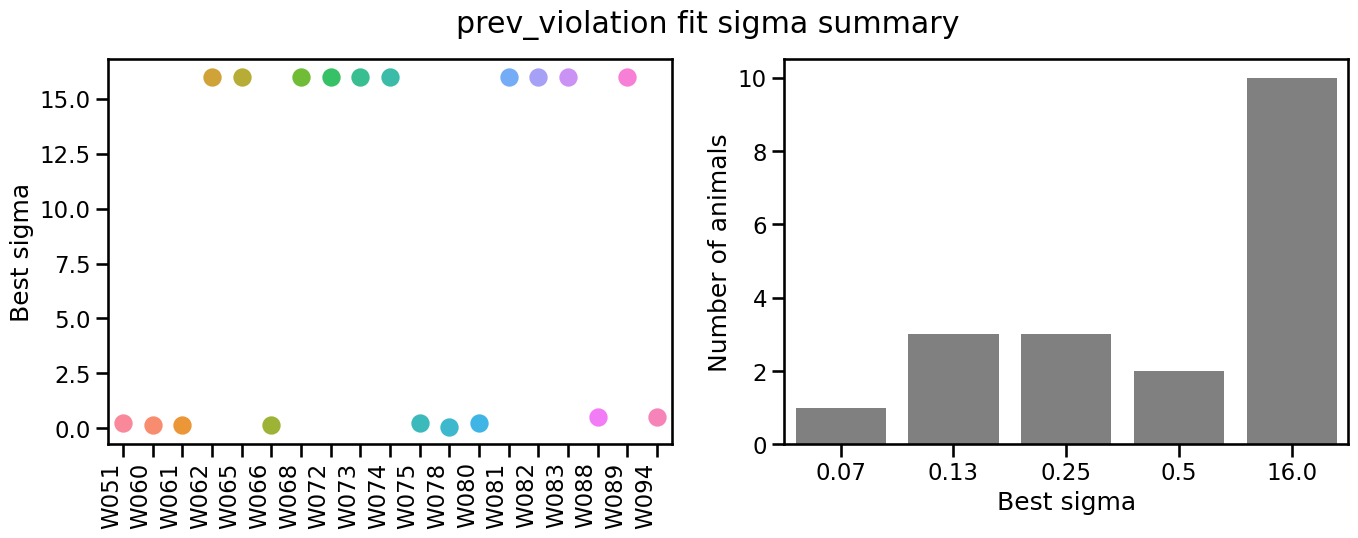

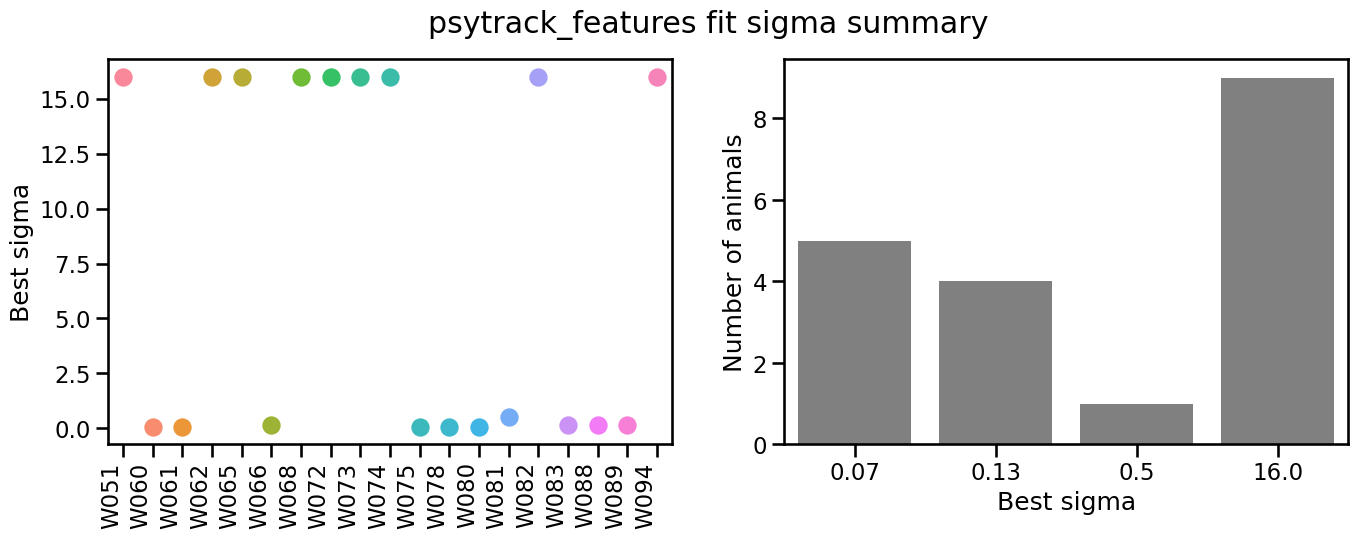

In [8]:
mvc = ModelVisualizerCompare(experiment)
df = mvc.find_best_fit(group="model_name")
for model_name, model_df in df.groupby("model_name"):
    mvc.plot_sigma_summary(model_df, title=f"{model_name} fit sigma summary")

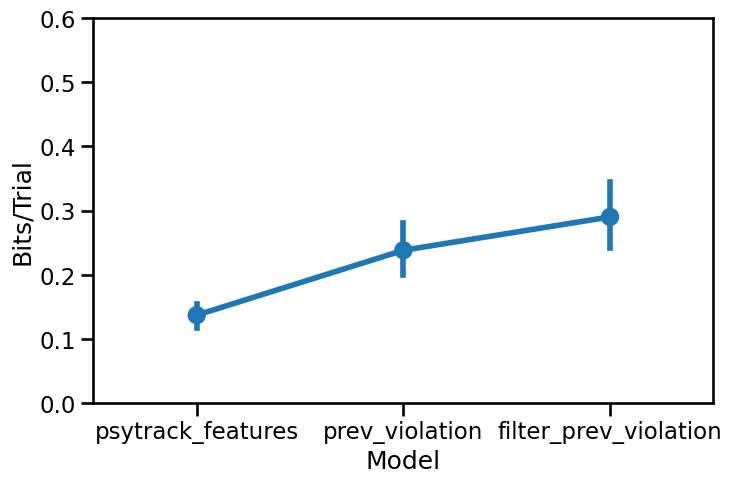

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue=None,
    ax=ax,
    order=["psytrack_features", "prev_violation", "filter_prev_violation"],
    ylim=(0, 0.6),
)

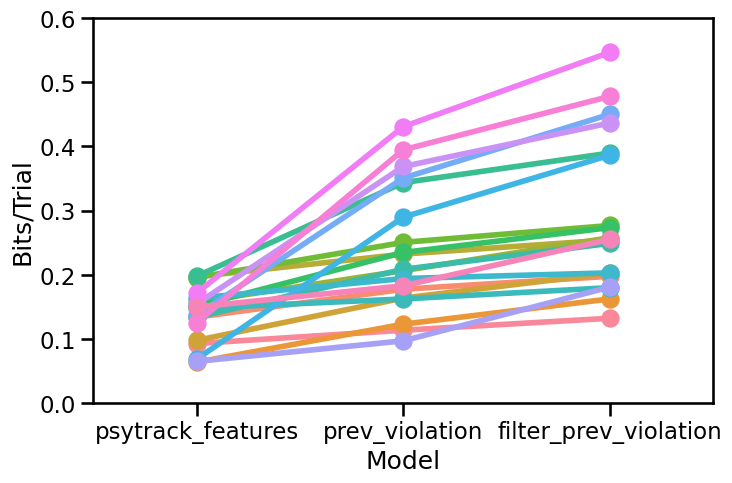

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue="animal_id",
    ax=ax,
    order=["psytrack_features", "prev_violation", "filter_prev_violation"],
    ylim=(0, 0.6),
)

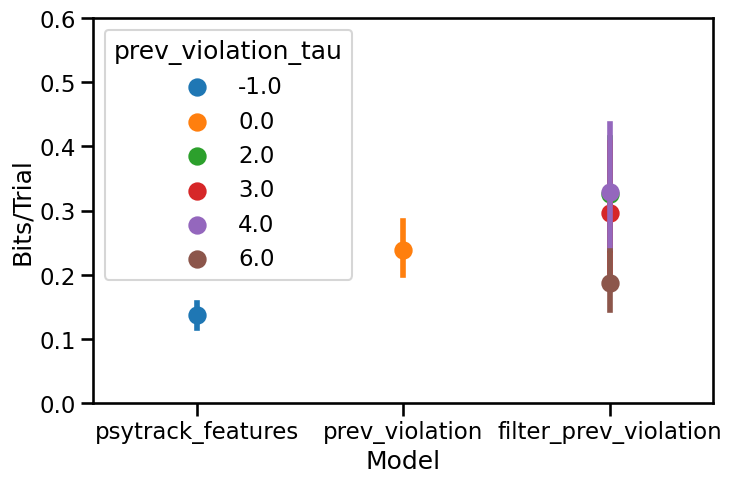

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue="prev_violation_tau",
    ax=ax,
    order=["psytrack_features", "prev_violation", "filter_prev_violation"],
    ylim=(0, 0.6),
)

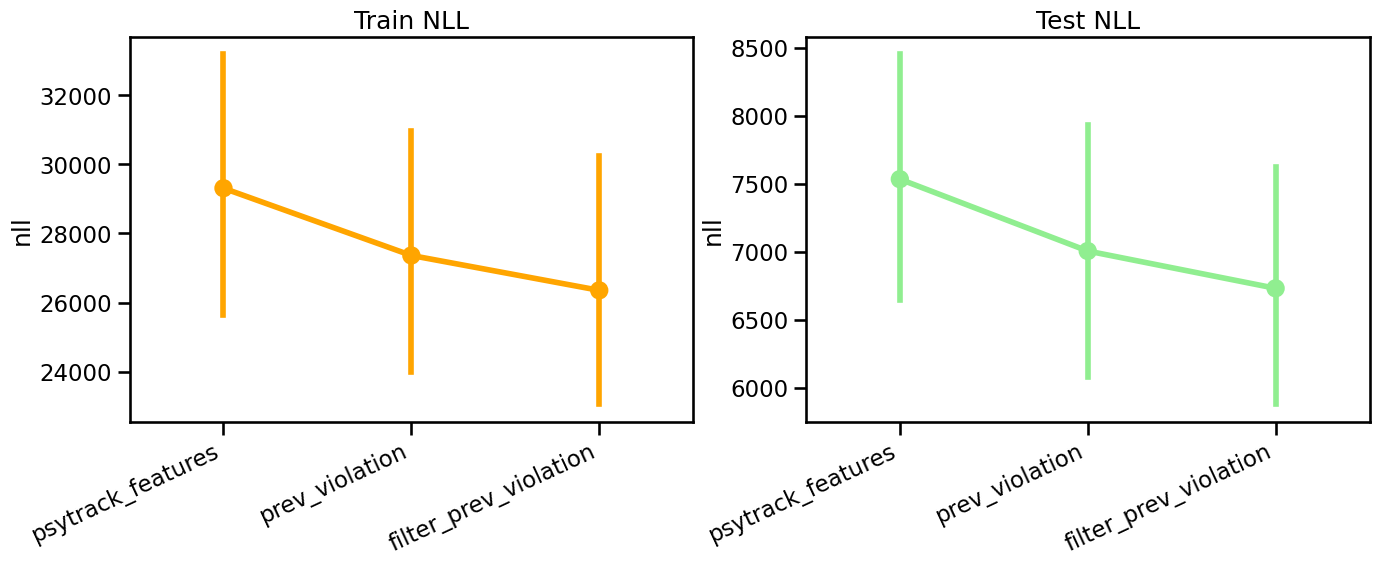

In [12]:
mvc.plot_train_and_test_nll(
    order=["psytrack_features", "prev_violation", "filter_prev_violation"]
)